In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [3]:
x_train= train_datagen.flow_from_directory(r"C:\Users\ELCOT\Desktop\project\Dataset\train",target_size=(64,64),batch_size=5,color_mode='grayscale',class_mode='categorical')
x_test= test_datagen.flow_from_directory(r"C:\Users\ELCOT\Desktop\project\Dataset\test",target_size=(64,64),batch_size=5,color_mode='grayscale',class_mode='categorical')

Found 594 images belonging to 6 classes.
Found 30 images belonging to 6 classes.


In [4]:
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
model=Sequential()

In [5]:
model.add(Conv2D(32,(3,3),input_shape=(64,64,1),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=512,activation="relu"))
model.add(Dense(units=512,activation="relu"))
model.add(Dense(units=6,activation="softmax"))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 512)               3

In [7]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [8]:
model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=30/3)

C:\Users\ELCOT\AppData\Local\Temp/ipykernel_10428/4165302777.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=30/3)


Epoch 1/10
119/119 [==============================] - 38s 262ms/step - loss: 1.3574 - accuracy: 0.4343 - val_loss: 0.7669 - val_accuracy: 0.6667
Epoch 2/10
119/119 [==============================] - 23s 194ms/step - loss: 0.5897 - accuracy: 0.7660
Epoch 3/10
119/119 [==============================] - 25s 209ms/step - loss: 0.3480 - accuracy: 0.8737
Epoch 4/10
119/119 [==============================] - 23s 190ms/step - loss: 0.3022 - accuracy: 0.8855
Epoch 5/10
119/119 [==============================] - 24s 200ms/step - loss: 0.2688 - accuracy: 0.9007
Epoch 6/10
119/119 [==============================] - 24s 203ms/step - loss: 0.1780 - accuracy: 0.9327
Epoch 7/10
119/119 [==============================] - 26s 217ms/step - loss: 0.1911 - accuracy: 0.9293
Epoch 8/10
119/119 [==============================] - 22s 187ms/step - loss: 0.1156 - accuracy: 0.9529
Epoch 9/10
119/119 [==============================] - 22s 184ms/step - loss: 0.1126 - accuracy: 0.9646
Epoch 10/10
119/119 [==========

In [9]:
model.save('gestures.h5')

In [10]:
model_json=model.to_json()
with open("model-bw.json","w")as json_file:
  json_file.write(model_json)

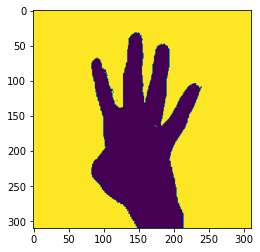

In [48]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model("gestures.h5")
path="C:\\Users\\ELCOT\\Desktop\\project\\Dataset\\test\\4\\2.jpg"
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
imgs=mpimg.imread(path)
imgplot=plt.imshow(imgs)
plt.show()

In [50]:
img=image.load_img(path,color_mode="grayscale",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
pred=model.predict(x)
pred
index=['0','1','2','3','4','5']
result=index[np.argmax(pred)]
result

1/1 [==============================] - 1s 616ms/step


'4'

In [53]:
import numpy as np
p=[]
for i in range(0,6):
    for j in range(0,5):
        path="C:\\Users\\ELCOT\\Desktop\\project\\Dataset\\test\\"+str(i)+"\\"+str(j)+".jpg"
        img=image.load_img(path,color_mode="grayscale",target_size=(64,64))
        x=image.img_to_array(img)
        x=np.expand_dims(x,axis=0)
        pred=np.argmax(model.predict(x),axis=-1)
        p.append(pred)
print(p)

1/1 [==============================] - 0s 93ms/step
[array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([2], dtype=int64), array([2], dtype=int64), array([1], dtype=int64), array([2], dtype=int64), array([2], dtype=int64), array([3], dtype=int64), array([3], dtype=int64), array([3], dtype=int64), array([3], dtype=int64), array([3], dtype=int64), array([4], dtype=int64), array([4], dtype=int64), array([4], dtype=int64), array([4], dtype=int64), array([4], dtype=int64), array([5], dtype=int64), array([5], dtype=int64), array([5], dtype=int64), array([5], dtype=int64), array([5], dtype=int64)]
